In [1]:
#plan
#investigate: what is the ratio between normalized and non-normalized sinograms? 

In [2]:
import numpy as np
import importlib
import matplotlib.pyplot as plt

import representation
import kex_data
import kex_headers
import listmode
import petlink
import position
import filefit as ff
import e7tools

In [3]:
fake_sinogram = np.ones(kex_headers.HISTOGRAM_SHAPE, dtype='uint16')
fake_sinogram[-1] = 0 # no randoms / delays

In [4]:
workplace = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/norm_effect/"
ff.make_kex_sino_test_folder(workplace) #copy sinogram hdrs, mhdr from kex dataset to 

In [5]:
s_paths = ff.refolder_paths(workplace, kex_data.get_sino_paths())

ref = 1
samplekey = kex_data.DATA_KEYS[ref]
print("testing with", samplekey)
path = s_paths[ref]
print("path", path)
with open(path, 'wb') as file:
    file.write(fake_sinogram)

testing with cylinder 1
path C:/Users/petct/Desktop/Hugo/Code/PythonMEX/norm_effect//CylinderPET-LM-01-sino-0.s


In [6]:
fake_eo = workplace + "norm_fake_sino.mhdr"

In [7]:
inter_place = workplace + "intermediates"
ff.prep_folder(inter_place, [])

In [8]:
mhdrs = ff.refolder_paths(workplace, kex_data.get_sino_mainhdrs())
print("returncode", e7tools.recon_intermediates(mhdrs[ref], kex_data.NORM_PATH, fake_eo, inter_place))

stdout
 b''
stderr
 b"I 05/29/2020 10:57:44.491 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/29/2020 10:57:44.491 (UTC+01:00) Number of NUMA nodes: 1
I 05/29/2020 10:57:44.492 (UTC+01:00) Number of physical processor packages: 1
I 05/29/2020 10:57:44.492 (UTC+01:00) Number of processor cores: 4
I 05/29/2020 10:57:44.492 (UTC+01:00) Number of logical processors: 8
I 05/29/2020 10:57:44.492 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/29/2020 10:57:44.492 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/29/2020 10:57:44.492 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/29/2020 10:57:44.693 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/29/2020 10:57:44.695 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/29/2020 10:57:44.695 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/29/2020 10:57:44.695 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/29/2020 10:57:44.695 (UTC+01:0

In [9]:
norm_fake_sino = ff.get_data(fake_eo.replace(".mhdr", "_00.s"), shape=(621,168,400), dtype=np.float32)

zero count 0


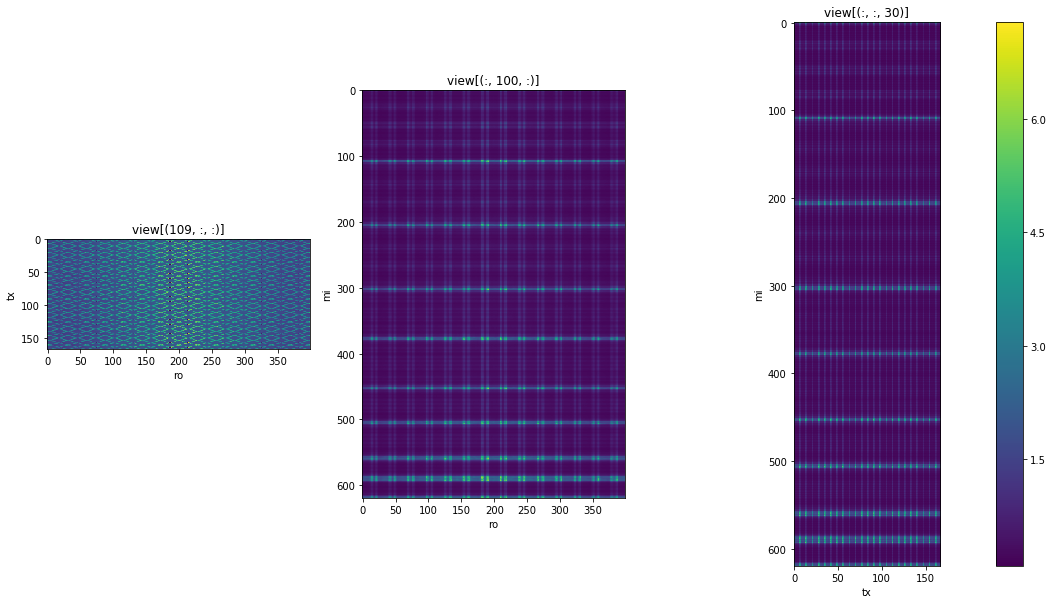

In [10]:
import volume_view as vv
import visual
importlib.reload(vv)
fig, row = plt.subplots(ncols=3, figsize=(20,10))
viewpairs = [(1,2), (0,2), (0,1)]
dimlabels = ['mi', 'tx', 'ro']
views = vv.plot_views(norm_fake_sino, position = [109, 100, 30], viewpairs=viewpairs, axes=row)
visual.same_colorbar(fig, views, row)

vv.set_labels(viewpairs, row, dimlabels)
print("zero count", np.sum(norm_fake_sino == 0))

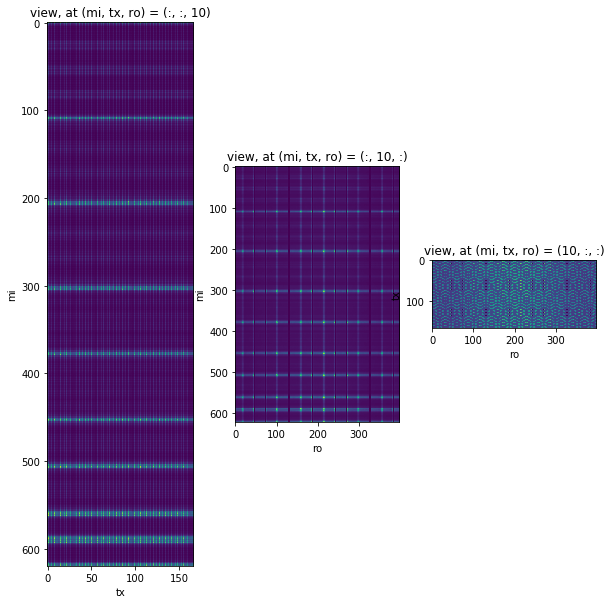

In [11]:
importlib.reload(vv)
norm_sino = ff.get_data(inter_place +"/norm3d_00.a" , shape=(621,168, 400), dtype=np.float32)
fig, axes = plt.subplots(ncols=3, figsize=(10,10))
ims = vv.plot_views(norm_sino, [10,10,10], axes=axes, dimlabels = ['mi', 'tx', 'ro'])

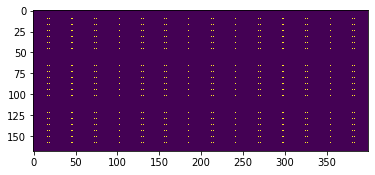

In [12]:
plt.imshow(1*(norm_sino[50] == 0))

zero count 80313


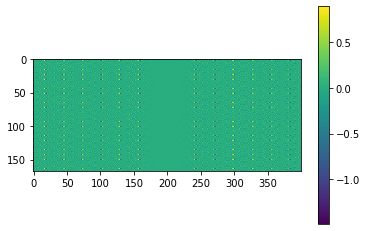

In [13]:
diff = norm_fake_sino - norm_sino
plt.imshow(diff[50])
plt.colorbar()
print("zero count", np.sum(diff == 0))

In [19]:
print(np.min(diff))
print(np.max(diff))
print(np.median(diff))
print(np.mean(diff))

-7.0249133
4.48298
1.847744e-06
-0.00036980168


In [14]:
vv.get_all_viewpairs(3)

[(0, 1), (0, 2), (1, 2)]